# 자료 읽어오기

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('교통사고현황.csv')
df

,발생일,발생시간,발생지_시도,발생지_시군구,법정동명,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,2017-01-01,0,서울,강북구,미아동,1,0,1,6,0
1,2017-01-01,0,서울,노원구,상계동,1,0,0,1,0
2,2017-01-01,0,서울,동작구,상도동,1,0,0,1,0
3,2017-01-01,0,서울,서초구,서초동,1,0,0,1,0
4,2017-01-01,0,서울,송파구,잠실동,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
114438,2019-12-31,22,서울,송파구,송파동,1,0,0,1,0
114439,2019-12-31,22,서울,영등포구,대림동,1,0,0,1,0
114440,2019-12-31,22,서울,중랑구,면목동,1,0,0,0,1
114441,2019-12-31,23,서울,강남구,수서동,1,0,0,1,0


# 읽어온 자료 발생일 기준으로 groupby

In [2]:
df = pd.DataFrame(df)
df = df.groupby('발생일').sum().reset_index( level = '발생일' )
df

,발생일,발생시간,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,2017-01-01,734,73,2,25,90,10
1,2017-01-02,1118,82,4,27,92,17
2,2017-01-03,1148,88,1,25,80,13
3,2017-01-04,1409,115,1,39,99,25
4,2017-01-05,1269,103,1,34,111,8
...,...,...,...,...,...,...,...
1090,2019-12-27,1305,94,0,27,88,14
1091,2019-12-28,1150,94,0,27,105,10
1092,2019-12-29,1024,78,1,26,87,7
1093,2019-12-30,1281,91,1,19,93,53


# 17, 18년도 자료 뽑기

17년도 자료

In [3]:
df_17 = df[df['발생일'].str.contains('2017')]
df_17 = df_17.reset_index()
df_17

,index,발생일,발생시간,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,0,2017-01-01,734,73,2,25,90,10
1,1,2017-01-02,1118,82,4,27,92,17
2,2,2017-01-03,1148,88,1,25,80,13
3,3,2017-01-04,1409,115,1,39,99,25
4,4,2017-01-05,1269,103,1,34,111,8
...,...,...,...,...,...,...,...,...
360,360,2017-12-27,1228,94,4,28,86,12
361,361,2017-12-28,1197,91,1,28,81,12
362,362,2017-12-29,1611,119,1,38,114,15
363,363,2017-12-30,963,82,0,24,111,4


18년도 자료

In [4]:
df_18 = df[df['발생일'].str.contains('2018')]
df_18 = df_18.reset_index()
df_18

,index,발생일,발생시간,사고건수,사망자수,중상자수,경상자수,부상신고자수
0,365,2018-01-01,643,67,1,32,61,7
1,366,2018-01-02,1039,78,0,29,58,4
2,367,2018-01-03,866,72,2,28,59,11
3,368,2018-01-04,1086,81,3,27,65,4
4,369,2018-01-05,1332,94,1,35,82,16
...,...,...,...,...,...,...,...,...
360,725,2018-12-27,1599,115,0,24,116,15
361,726,2018-12-28,1492,113,0,20,132,7
362,727,2018-12-29,1037,86,1,29,93,6
363,728,2018-12-30,853,69,2,28,77,15


# 17, 18년도 자료에서 발생한 날짜, 사고건수로 새로운 dataframe 만들기

17년도 자료

In [5]:
df_aci17 = pd.DataFrame({'date' : df_17['발생일'],
                      'count' : df_17['사고건수']})
df_aci17

,date,count
0,2017-01-01,73
1,2017-01-02,82
2,2017-01-03,88
3,2017-01-04,115
4,2017-01-05,103
...,...,...
360,2017-12-27,94
361,2017-12-28,91
362,2017-12-29,119
363,2017-12-30,82


18년도 자료

In [6]:
df_aci18 = pd.DataFrame({'date' : df_18['발생일'],
                      'count' : df_18['사고건수']})
df_aci18

,date,count
0,2018-01-01,67
1,2018-01-02,78
2,2018-01-03,72
3,2018-01-04,81
4,2018-01-05,94
...,...,...
360,2018-12-27,115
361,2018-12-28,113
362,2018-12-29,86
363,2018-12-30,69


---

# 날씨 자료 crawling

In [7]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import copy

#response = requests.get('https://www.weather.go.kr/w/obs-climate/land/past-obs/obs-by-day.do?stn=108&yy=2017&mm=1&obs=9')
#html_doc = response.text

#soup = BeautifulSoup(html_doc, "html.parser")

In [8]:
# date_list = list()
# weather_list = list()

# 날씨 자료 가져오는 함수

5주 있는 달

In [9]:
def get_address(adress):           #5주 있는 달 날씨정보
    response = requests.get(adress)
    html_doc = response.text

    soup = BeautifulSoup(html_doc, "html.parser")
    xa= ' \xa0 '
    for i in range(5):
        weak_day = soup.select_one('body > div.container > section > div > div.cont-wrap > div.cmp-past-obs > div:nth-child(3) > div > table > tbody > tr:nth-child(%d)'%((i+1)*2-1))
        day = weak_day.select('tr > td > span')

        weak_weather = soup.select_one('body > div.container > section > div > div.cont-wrap > div.cmp-past-obs > div:nth-child(3) > div > table > tbody > tr:nth-child(%d)'%((i+1)*2))
        weather = weak_weather.select('tr > td ')

        weather_jan = pd.DataFrame()

        for i in day:
            if i.text == '\xa0':
                continue
            else:
                date_list.append(i.text)

        for j in weather:
            if j.text == '\n\xa0\n':
                continue
            else:
                weather_day = re.sub('\n', ' ', j.text)
                weather_list.append(weather_day)
    

6주 있는 달

In [10]:
def get_address6(adress):           #6주 있는 달 날씨정보
    response = requests.get(adress)
    html_doc = response.text

    soup = BeautifulSoup(html_doc, "html.parser")
    xa= ' \xa0 '
    for i in range(6):
        weak_day = soup.select_one('body > div.container > section > div > div.cont-wrap > div.cmp-past-obs > div:nth-child(3) > div > table > tbody > tr:nth-child(%d)'%((i+1)*2-1))
        day = weak_day.select('tr > td > span')

        weak_weather = soup.select_one('body > div.container > section > div > div.cont-wrap > div.cmp-past-obs > div:nth-child(3) > div > table > tbody > tr:nth-child(%d)'%((i+1)*2))
        weather = weak_weather.select('tr > td ')

        weather_jan = pd.DataFrame()

        for i in day:
            if i.text == '\xa0':
                continue
            else:
                date_list.append(i.text)

        for j in weather:
            if j.text == '\n\xa0\n':
                continue
            else:
                weather_day = re.sub('\n', ' ', j.text)
                weather_list.append(weather_day)
    

2017년 날씨 자료

In [11]:
date_list = list()
weather_list = list()

get_address('https://www.weather.go.kr/w/obs-climate/land/past-obs/obs-by-day.do?stn=108&yy=2017&mm=1&obs=9')
get_address('https://www.weather.go.kr/w/obs-climate/land/past-obs/obs-by-day.do?stn=108&yy=2017&mm=2&obs=9')
get_address('https://www.weather.go.kr/w/obs-climate/land/past-obs/obs-by-day.do?stn=108&yy=2017&mm=3&obs=9')
get_address6('https://www.weather.go.kr/w/obs-climate/land/past-obs/obs-by-day.do?stn=108&yy=2017&mm=4&obs=9')
get_address('https://www.weather.go.kr/w/obs-climate/land/past-obs/obs-by-day.do?stn=108&yy=2017&mm=5&obs=9')
get_address('https://www.weather.go.kr/w/obs-climate/land/past-obs/obs-by-day.do?stn=108&yy=2017&mm=6&obs=9')
get_address6('https://www.weather.go.kr/w/obs-climate/land/past-obs/obs-by-day.do?stn=108&yy=2017&mm=7&obs=9')
get_address('https://www.weather.go.kr/w/obs-climate/land/past-obs/obs-by-day.do?stn=108&yy=2017&mm=8&obs=9')
get_address('https://www.weather.go.kr/w/obs-climate/land/past-obs/obs-by-day.do?stn=108&yy=2017&mm=9&obs=9')
get_address('https://www.weather.go.kr/w/obs-climate/land/past-obs/obs-by-day.do?stn=108&yy=2017&mm=10&obs=9')
get_address('https://www.weather.go.kr/w/obs-climate/land/past-obs/obs-by-day.do?stn=108&yy=2017&mm=11&obs=9')
get_address6('https://www.weather.go.kr/w/obs-climate/land/past-obs/obs-by-day.do?stn=108&yy=2017&mm=12&obs=9')

print(date_list)
print(weather_list)

['1일', '2일', '3일', '4일', '5일', '6일', '7일', '8일', '9일', '10일', '11일', '12일', '13일', '14일', '15일', '16일', '17일', '18일', '19일', '20일', '21일', '22일', '23일', '24일', '25일', '26일', '27일', '28일', '29일', '30일', '31일', '1일', '2일', '3일', '4일', '5일', '6일', '7일', '8일', '9일', '10일', '11일', '12일', '13일', '14일', '15일', '16일', '17일', '18일', '19일', '20일', '21일', '22일', '23일', '24일', '25일', '26일', '27일', '28일', '1일', '2일', '3일', '4일', '5일', '6일', '7일', '8일', '9일', '10일', '11일', '12일', '13일', '14일', '15일', '16일', '17일', '18일', '19일', '20일', '21일', '22일', '23일', '24일', '25일', '26일', '27일', '28일', '29일', '30일', '31일', '1일', '2일', '3일', '4일', '5일', '6일', '7일', '8일', '9일', '10일', '11일', '12일', '13일', '14일', '15일', '16일', '17일', '18일', '19일', '20일', '21일', '22일', '23일', '24일', '25일', '26일', '27일', '28일', '29일', '30일', '1일', '2일', '3일', '4일', '5일', '6일', '7일', '8일', '9일', '10일', '11일', '12일', '13일', '14일', '15일', '16일', '17일', '18일', '19일', '20일', '21일', '22일', '23일', '24일', '25일', '26일', '27일', '28일', '29일', '

2018년 날씨 자료

In [12]:
date_list = list()
weather_list = list()

get_address('https://www.weather.go.kr/w/obs-climate/land/past-obs/obs-by-day.do?stn=108&yy=2018&mm=1&obs=9')
get_address('https://www.weather.go.kr/w/obs-climate/land/past-obs/obs-by-day.do?stn=108&yy=2018&mm=2&obs=9')
get_address('https://www.weather.go.kr/w/obs-climate/land/past-obs/obs-by-day.do?stn=108&yy=2018&mm=3&obs=9')
get_address('https://www.weather.go.kr/w/obs-climate/land/past-obs/obs-by-day.do?stn=108&yy=2018&mm=4&obs=9')
get_address('https://www.weather.go.kr/w/obs-climate/land/past-obs/obs-by-day.do?stn=108&yy=2018&mm=5&obs=9')
get_address('https://www.weather.go.kr/w/obs-climate/land/past-obs/obs-by-day.do?stn=108&yy=2018&mm=6&obs=9')
get_address('https://www.weather.go.kr/w/obs-climate/land/past-obs/obs-by-day.do?stn=108&yy=2018&mm=7&obs=9')
get_address('https://www.weather.go.kr/w/obs-climate/land/past-obs/obs-by-day.do?stn=108&yy=2018&mm=8&obs=9')
get_address6('https://www.weather.go.kr/w/obs-climate/land/past-obs/obs-by-day.do?stn=108&yy=2018&mm=9&obs=9')
get_address('https://www.weather.go.kr/w/obs-climate/land/past-obs/obs-by-day.do?stn=108&yy=2018&mm=10&obs=9')
get_address('https://www.weather.go.kr/w/obs-climate/land/past-obs/obs-by-day.do?stn=108&yy=2018&mm=11&obs=9')
get_address6('https://www.weather.go.kr/w/obs-climate/land/past-obs/obs-by-day.do?stn=108&yy=2018&mm=12&obs=9')

print(date_list)
print(weather_list)

['1일', '2일', '3일', '4일', '5일', '6일', '7일', '8일', '9일', '10일', '11일', '12일', '13일', '14일', '15일', '16일', '17일', '18일', '19일', '20일', '21일', '22일', '23일', '24일', '25일', '26일', '27일', '28일', '29일', '30일', '31일', '1일', '2일', '3일', '4일', '5일', '6일', '7일', '8일', '9일', '10일', '11일', '12일', '13일', '14일', '15일', '16일', '17일', '18일', '19일', '20일', '21일', '22일', '23일', '24일', '25일', '26일', '27일', '28일', '1일', '2일', '3일', '4일', '5일', '6일', '7일', '8일', '9일', '10일', '11일', '12일', '13일', '14일', '15일', '16일', '17일', '18일', '19일', '20일', '21일', '22일', '23일', '24일', '25일', '26일', '27일', '28일', '29일', '30일', '31일', '1일', '2일', '3일', '4일', '5일', '6일', '7일', '8일', '9일', '10일', '11일', '12일', '13일', '14일', '15일', '16일', '17일', '18일', '19일', '20일', '21일', '22일', '23일', '24일', '25일', '26일', '27일', '28일', '29일', '30일', '1일', '2일', '3일', '4일', '5일', '6일', '7일', '8일', '9일', '10일', '11일', '12일', '13일', '14일', '15일', '16일', '17일', '18일', '19일', '20일', '21일', '22일', '23일', '24일', '25일', '26일', '27일', '28일', '29일', '

# 2017년 정보

17년 날씨정보 dataframe

In [13]:
df_wea17 = pd.DataFrame({'date2' : date_list,
                         'weather' : weather_list})

df_wea17

,date2,weather
0,1일,
1,2일,달무리
2,3일,달무리
3,4일,햇무리 채운
4,5일,햇무리
...,...,...
360,27일,
361,28일,
362,29일,
363,30일,


concat 이용해서 dataframe 합치기

In [14]:
#day2 삭제 전 df
df_plus17 = pd.concat([df_aci17, df_wea17], axis = 1)
df_plus17

,date,count,date2,weather
0,2017-01-01,73,1일,
1,2017-01-02,82,2일,달무리
2,2017-01-03,88,3일,달무리
3,2017-01-04,115,4일,햇무리 채운
4,2017-01-05,103,5일,햇무리
...,...,...,...,...
360,2017-12-27,94,27일,
361,2017-12-28,91,28일,
362,2017-12-29,119,29일,
363,2017-12-30,82,30일,


합친 데이터에서 날짜정보 하나 빼기

In [15]:
df_dropdate17 = df_plus17.drop(['date2'], axis = 1)
df17 = copy.deepcopy(df_dropdate17)
df17

,date,count,weather
0,2017-01-01,73,
1,2017-01-02,82,달무리
2,2017-01-03,88,달무리
3,2017-01-04,115,햇무리 채운
4,2017-01-05,103,햇무리
...,...,...,...
360,2017-12-27,94,
361,2017-12-28,91,
362,2017-12-29,119,
363,2017-12-30,82,


만들어진 dataframe에 무슨 요일인지 정보 추가

In [16]:
day_list = list()
day = 0
for i in range(365):
    if day%7 == 0:
        day_list.append('일요일')
    elif day%7 == 1:
        day_list.append('월요일')
    elif day%7 == 2:
        day_list.append('화요일')
    elif day%7 == 3:
        day_list.append('수요일')
    elif day%7 == 4:
        day_list.append('목요일')
    elif day%7 == 5:
        day_list.append('금요일')
    elif day%7 == 6:
        day_list.append('토요일')
    day += 1
    
#day_list
len(day_list)

365

In [17]:
#day 열 생성 ( 요일데이터 ) 
df17['day'] = day_list
df17

,date,count,weather,day
0,2017-01-01,73,,일요일
1,2017-01-02,82,달무리,월요일
2,2017-01-03,88,달무리,화요일
3,2017-01-04,115,햇무리 채운,수요일
4,2017-01-05,103,햇무리,목요일
...,...,...,...,...
360,2017-12-27,94,,수요일
361,2017-12-28,91,,목요일
362,2017-12-29,119,,금요일
363,2017-12-30,82,,토요일


In [18]:
mon17 = df17[df17.day.str.contains('월')]['count'].sum()
tue17 = df17[df17.day.str.contains('화')]['count'].sum()
wed17 = df17[df17.day.str.contains('수')]['count'].sum()
thu17 = df17[df17.day.str.contains('목')]['count'].sum()
fri17 = df17[df17.day.str.contains('금')]['count'].sum()
sat17 = df17[df17.day.str.contains('토')]['count'].sum()
sun17 = df17[df17.day.str.contains('일요')]['count'].sum()

print(mon17, tue17, wed17, thu17, fri17, sat17, sun17)

5374 5340 5798 5563 6030 6050 4470


비온날, 눈온날, 비+눈 같이온날의 일 수와 사고 수 정보

In [19]:
# 비온날의 총 합
# 100
rainday17 = df17[df17.weather.str.contains('비')]

rainday17 = rainday17.reset_index()

tot_rainday17 = 108 - 8 #비눈같이온날 마이너스
rainday17 = rainday17.drop(['index'], axis = 1)
rainday17

,date,count,weather,day
0,2017-01-15,106,비 박무 연무,일요일
1,2017-01-16,131,비 연무,월요일
2,2017-01-18,118,비 진눈깨비 박무 연무,수요일
3,2017-01-22,83,비 눈 진눈깨비 박무 연무,일요일
4,2017-02-28,101,비 진눈깨비 박무 연무,화요일
...,...,...,...,...
103,2017-11-21,95,비 박무,화요일
104,2017-11-24,140,눈 진눈깨비 박무,금요일
105,2017-12-03,75,비 안개비 안개 박무,일요일
106,2017-12-04,108,비 안개비 안개 박무,월요일


In [20]:
#비, 눈 같이온날 8일
rainsnowday17 = rainday17[rainday17.weather.str.contains('눈')]
rainsnowday17 = rainsnowday17.reset_index()
tot_rainsnowday17 = 8
rainsnowday17

,index,date,count,weather,day
0,2,2017-01-18,118,비 진눈깨비 박무 연무,수요일
1,3,2017-01-22,83,비 눈 진눈깨비 박무 연무,일요일
2,4,2017-02-28,101,비 진눈깨비 박무 연무,화요일
3,5,2017-03-01,106,비 진눈깨비 박무,수요일
4,14,2017-03-21,90,눈 진눈깨비,화요일
5,19,2017-04-07,116,비 눈 진눈깨비 연무,금요일
6,104,2017-11-24,140,눈 진눈깨비 박무,금요일
7,107,2017-12-16,135,비 눈 싸락눈 박무 연무,토요일


In [21]:
#비눈같이온날 사고의 합
tot_rainsnowaci17 = rainsnowday17['count'].sum()
tot_rainsnowaci17

889

In [22]:
#비온날 사고의 총 합
tot_rainaci17 = df17[df17.weather.str.contains('비')]['count'].sum()
tot_rainaci17 = tot_rainaci17 - tot_rainsnowaci17
tot_rainaci17

10715

In [23]:
#눈온날의 총 합
snowday17 = df17[df17.weather.str.contains('눈')]

snowday17 = snowday17.reset_index()

tot_snowday17 = 24 - 8 #비눈 같이온날 마이너스
snowday17 = snowday17.drop(['index'], axis = 1)
snowday17

,date,count,weather,day
0,2017-01-08,72,눈 박무 연무,일요일
1,2017-01-09,95,눈 연무,월요일
2,2017-01-10,104,눈,화요일
3,2017-01-12,113,눈,목요일
4,2017-01-13,117,눈 박무 연무,금요일
5,2017-01-18,118,비 진눈깨비 박무 연무,수요일
6,2017-01-22,83,비 눈 진눈깨비 박무 연무,일요일
7,2017-01-30,67,눈,월요일
8,2017-01-31,86,눈 박무,화요일
9,2017-02-03,102,눈,금요일


In [24]:
#눈온날 사고의 총 합
tot_snowaci17 = df17[df17.weather.str.contains('눈')]['count'].sum()
tot_snowaci17 = tot_snowaci17 - tot_rainsnowaci17
tot_snowaci17

1582

In [25]:
tot_normalday17 = 365 - tot_rainday17 - tot_snowday17 - tot_rainsnowday17
tot_normalday17

241

In [26]:
tot_aci17 = df17['count'].sum()
print(tot_aci17)

tot_normalaci17 = tot_aci17 - tot_rainaci17 - tot_snowaci17 - tot_rainsnowaci17
print(tot_normalaci17)

38625
25439


In [27]:
avg_normal17 = tot_normalaci17 / tot_normalday17
avg_rain17 = tot_rainaci17 / tot_rainday17
avg_snow17 = tot_snowaci17 / tot_snowday17
avg_rainsnow17 = tot_rainsnowaci17 / tot_rainsnowday17


print(avg_rain17)
print(avg_snow17)
print(avg_rainsnow17)
print(avg_normal17)

107.15
98.875
111.125
105.55601659751038


# 그래프 그리기

In [28]:
from matplotlib import font_manager, rc
font_path = "../data/malgun.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

연간 날씨비율, 사고비율 pie 그래프

<function matplotlib.pyplot.show(close=None, block=None)>

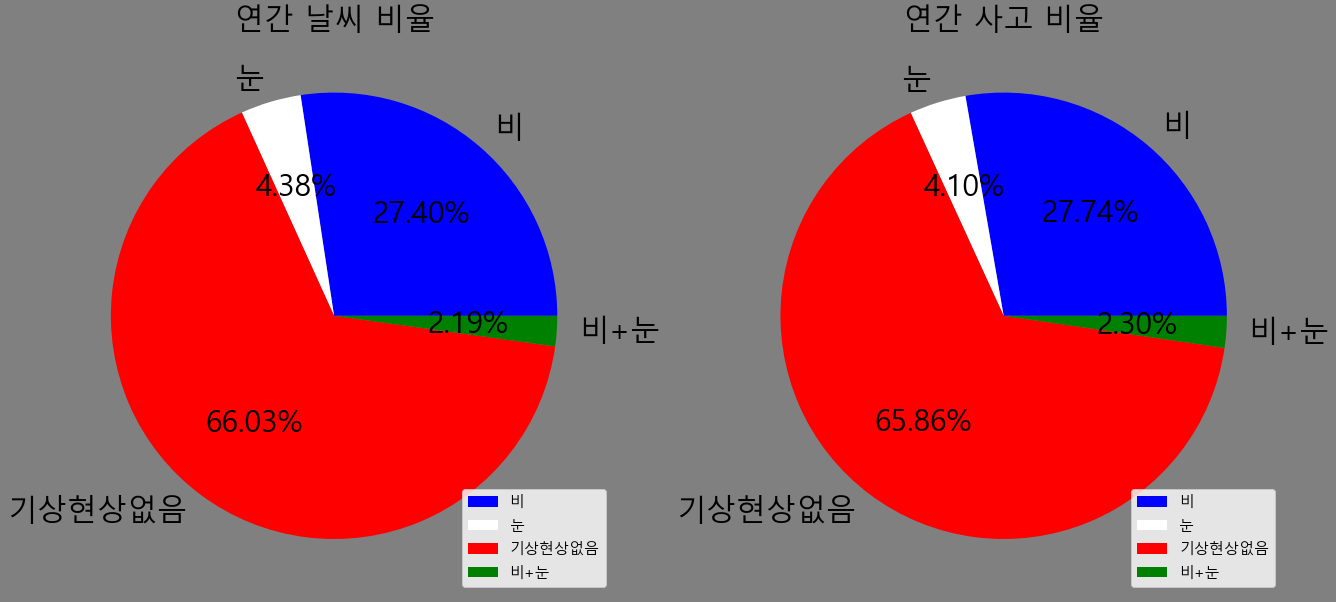

In [29]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize = (22, 22), facecolor = 'grey')
#pie 차트
plt.rc('font', size=15)
plt.subplot(1, 2, 1)
plt.pie([tot_rainday17, tot_snowday17, tot_normalday17, tot_rainsnowday17], labels = ['비', '눈', '기상현상없음', '비+눈'], colors = ['blue', 'white', 'red', 'green'], autopct = '%.2f%%', textprops = {'fontsize':30})
plt.title('연간 날씨 비율', fontsize=30)
plt.legend(loc='lower right')
plt.show

plt.subplot(1, 2, 2)
plt.pie([tot_rainaci17, tot_snowaci17, tot_normalaci17, tot_rainsnowaci17], labels = ['비', '눈', '기상현상없음', '비+눈'], colors = ['blue', 'white', 'red', 'green'], autopct = '%.2f%%', textprops = {'fontsize':30})
plt.title('연간 사고 비율', fontsize=30)
plt.legend(loc='lower right')
plt.show

각 날씨별 일간 사고량 평균

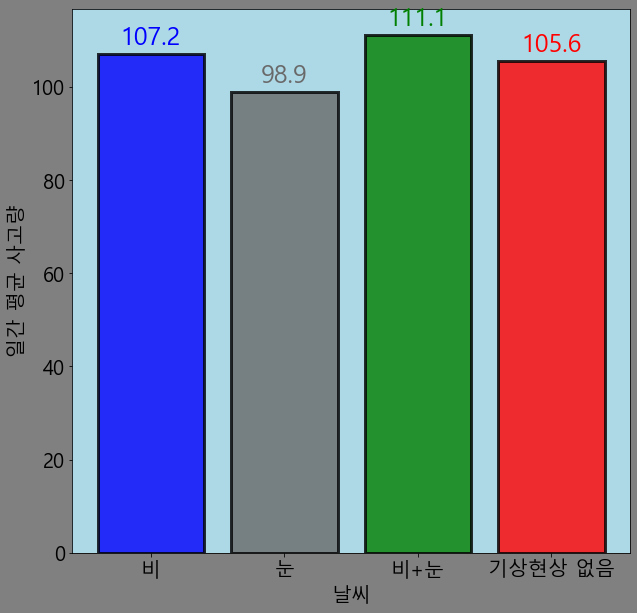

In [61]:
#날씨별 평균 사고량
weather_li = ['비', '눈', '비+눈', '기상현상 없음']
avg_li17 = [avg_rain17, avg_snow17, avg_rainsnow17, avg_normal17]
color_li = ['blue', 'dimgray', 'green', 'red']

plt.figure(figsize = (10, 10), facecolor = 'grey')
plt.gca().set_facecolor('lightblue') # 표 배경 색 설정
plt.rc('font', size=20) #전체적인 폰트 크기 설정
plt.bar(weather_li, avg_li17, color = color_li, edgecolor='black', alpha=0.8, linewidth=3) #alpha = 투명도

for i in range(len(avg_li17)):
    plt.text(weather_li[i], avg_li17[i] + 2 , '%.1f' %avg_li17[i], fontsize = 25, color = color_li[i], ha = 'center') 

plt.xlabel('날씨', fontsize=20)
plt.ylabel('일간 평균 사고량', fontsize=20)
plt.show()

요일별 일간 사고량

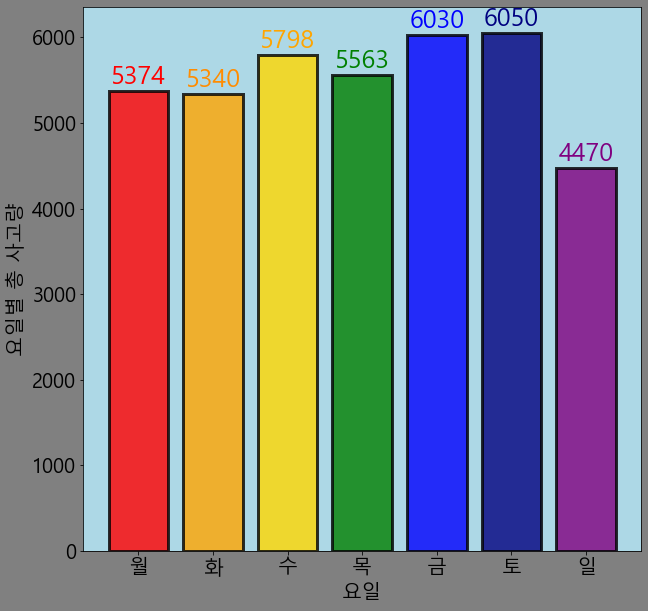

In [60]:
#요일별 평균 사고량

day_li = ['월', '화', '수', '목', '금', '토', '일']
dayaci_li17 = [mon17, tue17, wed17, thu17, fri17, sat17 ,sun17]
color_li = ['red', 'orange', 'gold', 'green', 'blue', 'navy', 'purple']
color_lit = ['red', 'darkorange', 'orange', 'green', 'blue', 'navy', 'purple']

plt.figure(figsize = (10, 10), facecolor = 'grey')
plt.gca().set_facecolor('lightblue')
plt.rc('font', size=20)
plt.bar(day_li, dayaci_li17,
        color = color_li, edgecolor='black', alpha=0.8, linewidth=3)

for i in range(len(day_li)):
    plt.text(day_li[i], dayaci_li17[i] + 80 , '%d' %dayaci_li17[i], fontsize = 25, color = color_lit[i], ha = 'center') 

plt.xlabel('요일', fontsize=20)
plt.ylabel('요일별 총 사고량', fontsize=20)
plt.show()

# 2018년 정보

In [32]:
#날씨정보 crawling
df_wea18 = pd.DataFrame({'date2' : date_list,
                       'weather' : weather_list})

df_wea18

,date2,weather
0,1일,
1,2일,달무리
2,3일,달무리
3,4일,햇무리 채운
4,5일,햇무리
...,...,...
360,27일,
361,28일,
362,29일,
363,30일,


In [33]:
#day2 삭제 전 df
df_plus18 = pd.concat([df_aci18, df_wea18], axis = 1)
df_plus18

,date,count,date2,weather
0,2018-01-01,67,1일,
1,2018-01-02,78,2일,달무리
2,2018-01-03,72,3일,달무리
3,2018-01-04,81,4일,햇무리 채운
4,2018-01-05,94,5일,햇무리
...,...,...,...,...
360,2018-12-27,115,27일,
361,2018-12-28,113,28일,
362,2018-12-29,86,29일,
363,2018-12-30,69,30일,


In [34]:
df_dropdate18 = df_plus18.drop(['date2'], axis = 1)
df18 = copy.deepcopy(df_dropdate18)

In [35]:
day_list = list()
day = 1
for i in range(365):
    if day%7 == 0:
        day_list.append('일요일')
    elif day%7 == 1:
        day_list.append('월요일')
    elif day%7 == 2:
        day_list.append('화요일')
    elif day%7 == 3:
        day_list.append('수요일')
    elif day%7 == 4:
        day_list.append('목요일')
    elif day%7 == 5:
        day_list.append('금요일')
    elif day%7 == 6:
        day_list.append('토요일')
    day += 1
    
#day_list
len(day_list)

365

In [36]:
#day 열 생성 ( 요일데이터 ) 
df18['day'] = day_list
df18

,date,count,weather,day
0,2018-01-01,67,,월요일
1,2018-01-02,78,달무리,화요일
2,2018-01-03,72,달무리,수요일
3,2018-01-04,81,햇무리 채운,목요일
4,2018-01-05,94,햇무리,금요일
...,...,...,...,...
360,2018-12-27,115,,목요일
361,2018-12-28,113,,금요일
362,2018-12-29,86,,토요일
363,2018-12-30,69,,일요일


In [37]:
mon18 = df18[df18.day.str.contains('월')]['count'].sum()
tue18 = df18[df18.day.str.contains('화')]['count'].sum()
wed18 = df18[df18.day.str.contains('수')]['count'].sum()
thu18 = df18[df18.day.str.contains('목')]['count'].sum()
fri18 = df18[df18.day.str.contains('금')]['count'].sum()
sat18 = df18[df18.day.str.contains('토')]['count'].sum()
sun18 = df18[df18.day.str.contains('일요')]['count'].sum()

print(mon18, tue18, wed18, thu18, fri18, sat18, sun18)

5493 5485 5664 5852 6295 5812 4194


In [38]:
# 비온날의 총 합
# 100
rainday18 = df18[df18.weather.str.contains('비')]

rainday18 = rainday18.reset_index()

tot_rainday18 = 108 - 8 #비눈같이온날 마이너스
rainday18 = rainday18.drop(['index'], axis = 1)
rainday18

,date,count,weather,day
0,2018-01-15,117,비 박무 연무,월요일
1,2018-01-16,103,비 연무,화요일
2,2018-01-18,99,비 진눈깨비 박무 연무,목요일
3,2018-01-22,97,비 눈 진눈깨비 박무 연무,월요일
4,2018-02-28,129,비 진눈깨비 박무 연무,수요일
...,...,...,...,...
103,2018-11-21,98,비 박무,수요일
104,2018-11-24,112,눈 진눈깨비 박무,토요일
105,2018-12-03,115,비 안개비 안개 박무,월요일
106,2018-12-04,99,비 안개비 안개 박무,화요일


In [39]:
#비, 눈 같이온날 8일
rainsnowday18 = rainday18[rainday18.weather.str.contains('눈')]
rainsnowday18 = rainsnowday18.reset_index()
tot_rainsnowday18 = 8
rainsnowday18

,index,date,count,weather,day
0,2,2018-01-18,99,비 진눈깨비 박무 연무,목요일
1,3,2018-01-22,97,비 눈 진눈깨비 박무 연무,월요일
2,4,2018-02-28,129,비 진눈깨비 박무 연무,수요일
3,5,2018-03-01,108,비 진눈깨비 박무,목요일
4,14,2018-03-21,90,눈 진눈깨비,수요일
5,19,2018-04-07,133,비 눈 진눈깨비 연무,토요일
6,104,2018-11-24,112,눈 진눈깨비 박무,토요일
7,107,2018-12-16,72,비 눈 싸락눈 박무 연무,일요일


In [40]:
#비눈같이온날 사고의 합
tot_rainsnowaci18 = rainsnowday18['count'].sum()
tot_rainsnowaci18

840

In [41]:
#비온날 사고의 총 합
tot_rainaci18 = df18[df18.weather.str.contains('비')]['count'].sum()
tot_rainaci18 = tot_rainaci18 - tot_rainsnowaci18
tot_rainaci18

10670

In [42]:
#눈온날의 총 합
snowday18 = df18[df18.weather.str.contains('눈')]

snowday18 = snowday18.reset_index()

tot_snowday18 = 24 - 8 #비눈 같이온날 마이너스
snowday18 = snowday18.drop(['index'], axis = 1)
snowday18

,date,count,weather,day
0,2018-01-08,97,눈 박무 연무,월요일
1,2018-01-09,100,눈 연무,화요일
2,2018-01-10,146,눈,수요일
3,2018-01-12,157,눈,금요일
4,2018-01-13,133,눈 박무 연무,토요일
5,2018-01-18,99,비 진눈깨비 박무 연무,목요일
6,2018-01-22,97,비 눈 진눈깨비 박무 연무,월요일
7,2018-01-30,115,눈,화요일
8,2018-01-31,118,눈 박무,수요일
9,2018-02-03,151,눈,토요일


In [43]:
#눈온날 사고의 총 합
tot_snowaci18 = df18[df18.weather.str.contains('눈')]['count'].sum()
tot_snowaci18 = tot_snowaci18 - tot_rainsnowaci18
tot_snowaci18

1893

In [44]:
tot_normalday18 = 365 - tot_rainday18 - tot_snowday18 - tot_rainsnowday18
tot_normalday18

241

In [45]:
tot_aci18 = df18['count'].sum()
print(tot_aci18)

tot_normalaci18 = tot_aci18 - tot_rainaci18 - tot_snowaci18 - tot_rainsnowaci18
print(tot_normalaci18)

38795
25392


In [46]:
avg_normal18 = tot_normalaci18 / tot_normalday18
avg_rain18 = tot_rainaci18 / tot_rainday18
avg_snow18 = tot_snowaci18 / tot_snowday18
avg_rainsnow18 = tot_rainsnowaci18 / tot_rainsnowday18


print(avg_rain18)
print(avg_snow18)
print(avg_rainsnow18)
print(avg_normal18)

106.7
118.3125
105.0
105.3609958506224


<function matplotlib.pyplot.show(close=None, block=None)>

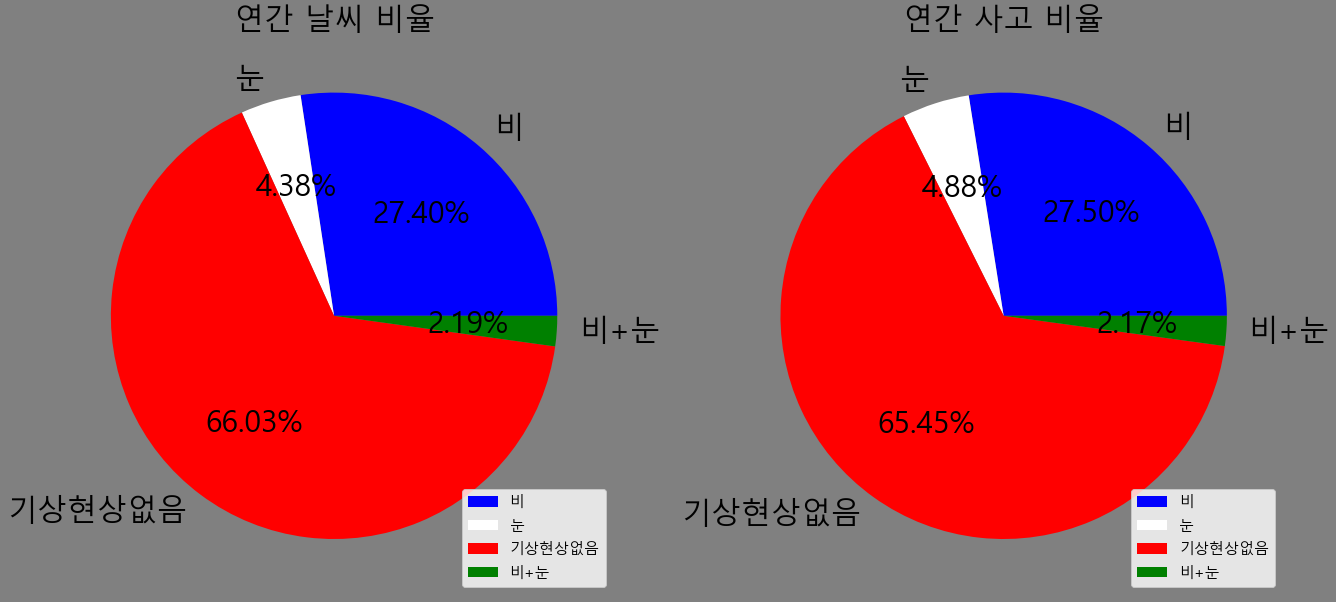

In [47]:
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize = (22, 22), facecolor = 'grey')
#pie 차트
plt.rc('font', size=15)
plt.subplot(1, 2, 1)
plt.pie([tot_rainday18, tot_snowday18, tot_normalday18, tot_rainsnowday18], labels = ['비', '눈', '기상현상없음', '비+눈'], colors = ['blue', 'white', 'red', 'green'], autopct = '%.2f%%', textprops = {'fontsize':30})
plt.title('연간 날씨 비율', fontsize=30)
plt.legend(loc='lower right')
plt.show

plt.subplot(1, 2, 2)
plt.pie([tot_rainaci18, tot_snowaci18, tot_normalaci18, tot_rainsnowaci18], labels = ['비', '눈', '기상현상없음', '비+눈'], colors = ['blue', 'white', 'red', 'green'], autopct = '%.2f%%', textprops = {'fontsize':30})
plt.title('연간 사고 비율', fontsize=30)
plt.legend(loc='lower right')
plt.show

각 날씨별 일간 사고량 평균

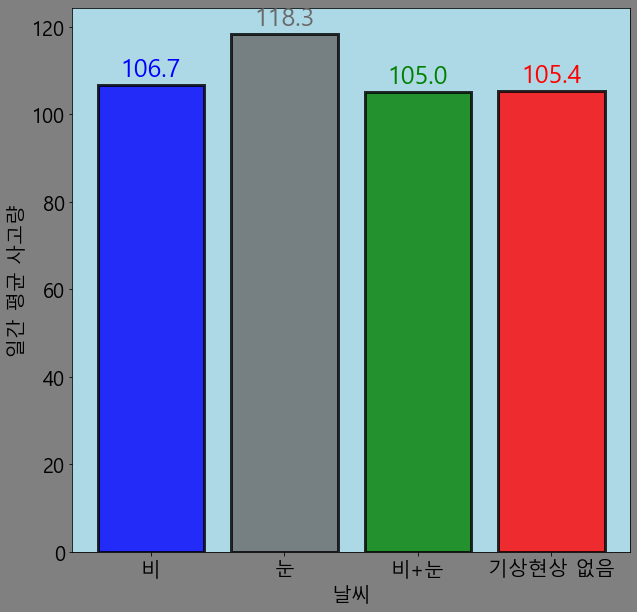

In [58]:
#날씨별 평균 사고량

weather_li = ['비', '눈', '비+눈', '기상현상 없음']
avg_li18 = [avg_rain18, avg_snow18, avg_rainsnow18, avg_normal18]
color_li = ['blue', 'dimgray', 'green', 'red']

plt.figure(figsize = (10, 10), facecolor = 'grey')
plt.gca().set_facecolor('lightblue') # 표 배경 색 설정
plt.rc('font', size=20) #전체적인 폰트 크기 설정
plt.bar(weather_li, avg_li18, color = color_li, edgecolor='black', alpha=0.8, linewidth=3) #alpha = 투명도

for i in range(len(avg_li18)):
    plt.text(weather_li[i], avg_li18[i] + 2 , '%.1f' %avg_li18[i], fontsize = 25, color = color_li[i], ha = 'center') 

plt.xlabel('날씨', fontsize=20)
plt.ylabel('일간 평균 사고량', fontsize=20)
plt.show()

요일별 일간 사고량

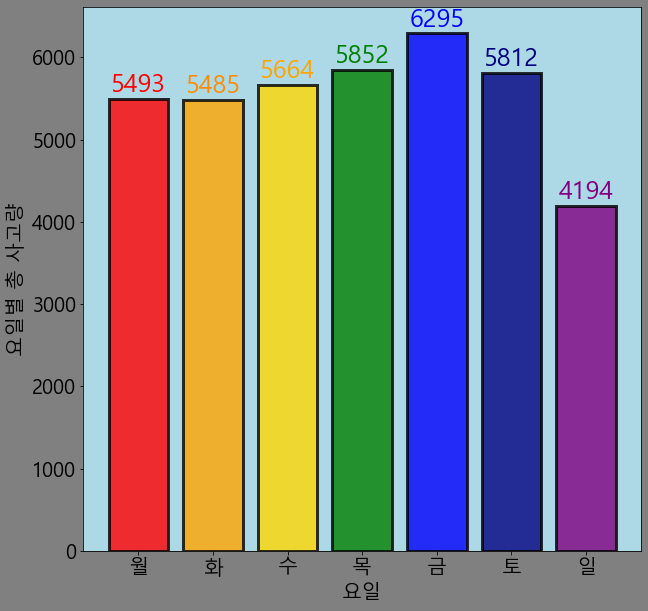

In [62]:
#요일별 평균 사고량

day_li = ['월', '화', '수', '목', '금', '토', '일']
dayaci_li18 = [mon18, tue18, wed18, thu18, fri18, sat18 ,sun18]
color_li = ['red', 'orange', 'gold', 'green', 'blue', 'navy', 'purple']
color_lit = ['red', 'darkorange', 'orange', 'green', 'blue', 'navy', 'purple']

plt.figure(figsize = (10, 10), facecolor = 'grey')
plt.gca().set_facecolor('lightblue')
plt.rc('font', size=20)
plt.bar(day_li, dayaci_li18,
        color = color_li, edgecolor='black', alpha=0.8, linewidth=3)

for i in range(len(day_li)):
    plt.text(day_li[i], dayaci_li18[i] + 80 , '%d' %dayaci_li18[i], fontsize = 25, color = color_lit[i], ha = 'center') 
    
plt.xlabel('요일', fontsize=20)
plt.ylabel('요일별 총 사고량', fontsize=20)
plt.show()

# 2017 2018 비교

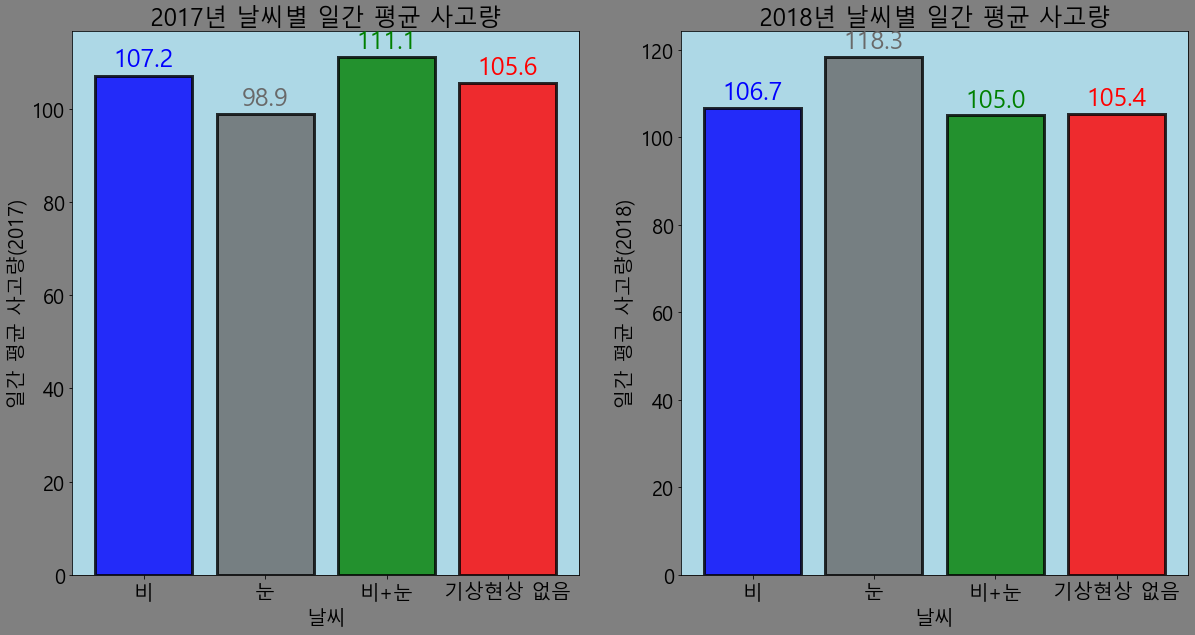

In [63]:
plt.figure(figsize = (20, 10), facecolor = 'grey')


plt.subplot(1, 2, 1)
weather_li = ['비', '눈', '비+눈', '기상현상 없음']
avg_li17 = [avg_rain17, avg_snow17, avg_rainsnow17, avg_normal17]
color_li = ['blue', 'dimgray', 'green', 'red']

#plt.figure(figsize = (10, 10), facecolor = 'grey')
plt.gca().set_facecolor('lightblue') # 표 배경 색 설정
plt.rc('font', size=20) #전체적인 폰트 크기 설정
plt.bar(weather_li, avg_li17, color = color_li, edgecolor='black', alpha=0.8, linewidth=3) #alpha = 투명도

for i in range(len(avg_li17)):
    plt.text(weather_li[i], avg_li17[i] + 2 , '%.1f' %avg_li17[i], fontsize = 25, color = color_li[i], ha = 'center') 

plt.xlabel('날씨', fontsize=20)
plt.ylabel('일간 평균 사고량(2017)', fontsize=20)
plt.title(' 2017년 날씨별 일간 평균 사고량 ' )




plt.subplot(1, 2, 2)
weather_li = ['비', '눈', '비+눈', '기상현상 없음']
avg_li18 = [avg_rain18, avg_snow18, avg_rainsnow18, avg_normal18]
color_li = ['blue', 'dimgray', 'green', 'red']

#plt.figure(figsize = (10, 10), facecolor = 'grey')
plt.gca().set_facecolor('lightblue') # 표 배경 색 설정
plt.rc('font', size=20) #전체적인 폰트 크기 설정
plt.bar(weather_li, avg_li18, color = color_li, edgecolor='black', alpha=0.8, linewidth=3) #alpha = 투명도

for i in range(len(avg_li18)):
    plt.text(weather_li[i], avg_li18[i] + 2 , '%.1f' %avg_li18[i], fontsize = 25, color = color_li[i], ha = 'center') 

plt.xlabel('날씨', fontsize=20)
plt.ylabel('일간 평균 사고량(2018)', fontsize=20)
plt.title(' 2018년 날씨별 일간 평균 사고량 ' )

plt.show()

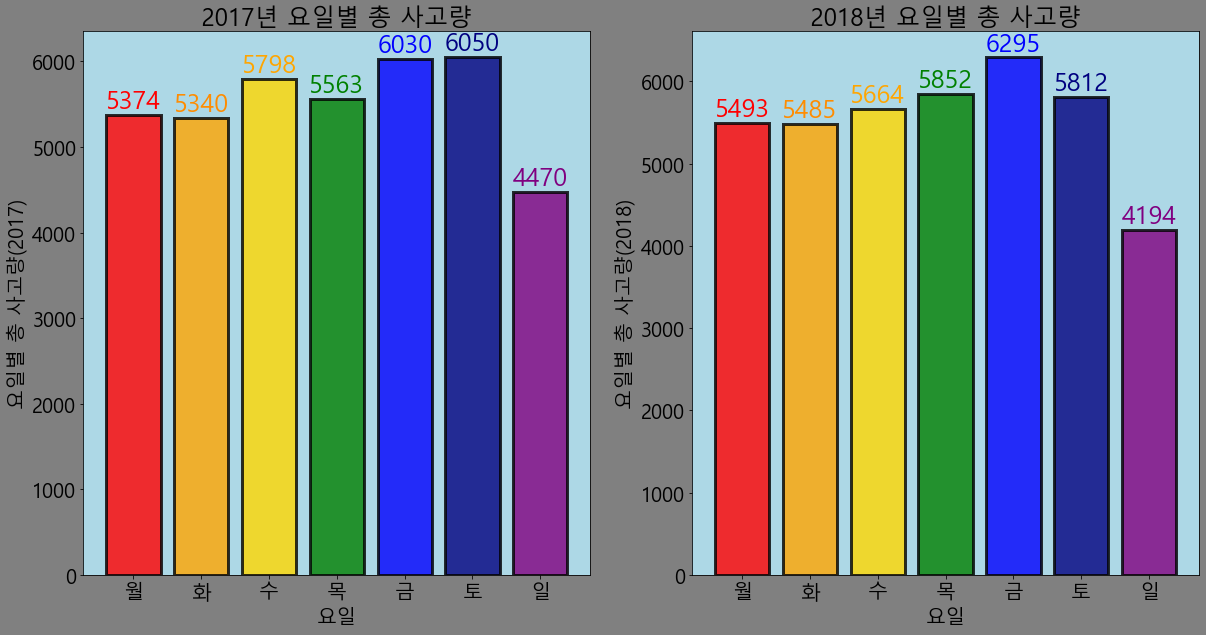

In [65]:
plt.figure(figsize = (20, 10), facecolor = 'grey')


plt.subplot(1, 2, 1)
day_li = ['월', '화', '수', '목', '금', '토', '일']
dayaci_li17 = [mon17, tue17, wed17, thu17, fri17, sat17 ,sun17]
color_li = ['red', 'orange', 'gold', 'green', 'blue', 'navy', 'purple']
color_lit = ['red', 'darkorange', 'orange', 'green', 'blue', 'navy', 'purple']

#plt.figure(figsize = (10, 10), facecolor = 'grey')
plt.gca().set_facecolor('lightblue')
plt.rc('font', size=20)
plt.bar(day_li, dayaci_li17,
        color = color_li, edgecolor='black', alpha=0.8, linewidth=3)

for i in range(len(day_li)):
    plt.text(day_li[i], dayaci_li17[i] + 80 , '%d' %dayaci_li17[i], fontsize = 25, color = color_lit[i], ha = 'center') 

plt.xlabel('요일', fontsize=20)
plt.ylabel('요일별 총 사고량(2017)', fontsize=20)
plt.title(' 2017년 요일별 총 사고량 ' )


plt.subplot(1, 2, 2)
day_li = ['월', '화', '수', '목', '금', '토', '일']
dayaci_li18 = [mon18, tue18, wed18, thu18, fri18, sat18 ,sun18]
color_li = ['red', 'orange', 'gold', 'green', 'blue', 'navy', 'purple']

#plt.figure(figsize = (10, 10), facecolor = 'grey')
plt.gca().set_facecolor('lightblue')
plt.rc('font', size=20)
plt.bar(day_li, dayaci_li18,
        color = color_li, edgecolor='black', alpha=0.8, linewidth=3)

for i in range(len(day_li)):
    plt.text(day_li[i], dayaci_li18[i] + 80 , '%d' %dayaci_li18[i], fontsize = 25, color = color_lit[i], ha = 'center') 
    
plt.xlabel('요일', fontsize=20)
plt.ylabel('요일별 총 사고량(2018)', fontsize=20)
plt.title(' 2018년 요일별 총 사고량 ' )

plt.show()

---

# 결론

서울에서 날씨는 사고발생에 큰 영향을 주지 않는다.
요일별로 봤을 때 일요일의 사고량이 확실히 낮고 금요일이 비교적 높은 편이다.